In [1]:
import math
import random
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Plotting function

In [2]:
def rosenbrock(x, y):
    a = 0
    b = 1
    return (a-x)**2 + b*(y-x**2)**2

In [3]:
def plot_function(function):

    # benchmark function settings
    xmin = -2
    xmax = -xmin

    ymin = -2
    ymax = -ymin

    # plot x, y axis value settings
    xs = np.arange(xmin, xmax, 0.25)
    ys = np.arange(ymin, ymax, 0.25)
    X, Y = np.meshgrid(xs, ys)

    Z = function(X, Y)

    fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
    fig.update_layout(title = function.__name__.capitalize(),
                    title_x=0.5,
                    title_font_size=34,
                    template='plotly',
                    width=900, 
                    height=700,
                    margin=dict(l=65, r=50, b=65, t=90)
                     )

    return fig

In [4]:
rosen = plot_function(rosenbrock)
rosen.show()

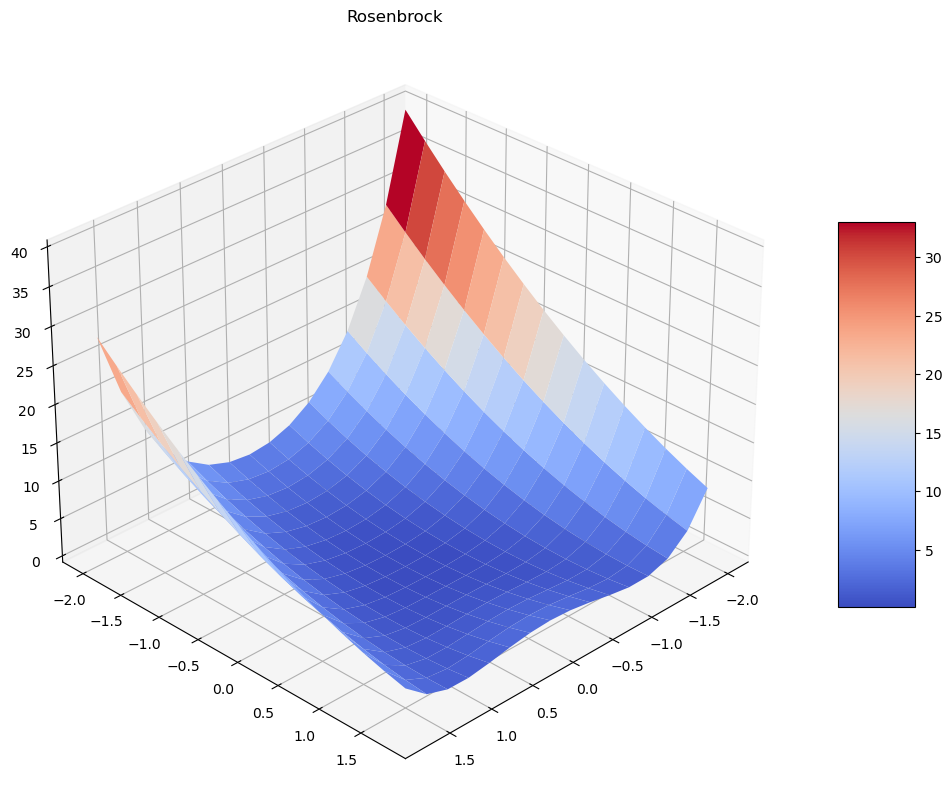

In [5]:
# plot x, y axis value settings
xs = np.arange(-2, 2, 0.25)
ys = np.arange(-2, 2, 0.25)
x1, x2 = np.meshgrid(xs, ys)

f = rosenbrock(x1,x2)

fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.set_title('Rosenbrock')
ax.view_init(elev=30, azim=45)
s = ax.plot_surface(x1, x2, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
fig.colorbar(s, shrink=0.5, aspect=5)
plt.show()

# Implementing Newton's method

In [6]:
from numpy.linalg import inv

In [7]:
def newton(iteration):
    '''Newton's interation method, step size is 1 and starting from all zero vectors'''

    X_0 = np.array([[np.random.uniform(-2, 2)],[np.random.uniform(-2, 2)]])
    progress = []
    for i in range(iteration):
        x = X_0[0,0]
        y = X_0[1,0]
        hessian = np.array([[-400*(y-x**2)+800*x**2+2,-400*x],[-400*x,200]])
        hessian_inv = inv(hessian)
        grad_f = np.array([[400*(x**3) - 400*x*y + 2*x - 2],[200*y-200*(x**2)]])
        X_0 = X_0 - hessian_inv @ grad_f   
        z = 100*(y-x**2)**2 + (1-(x))**2
        progress.append(np.asarray([X_0[0,0],X_0[1,0], z]))
        if z == 0:
            return np.asarray(progress)
    return np.asarray(progress)

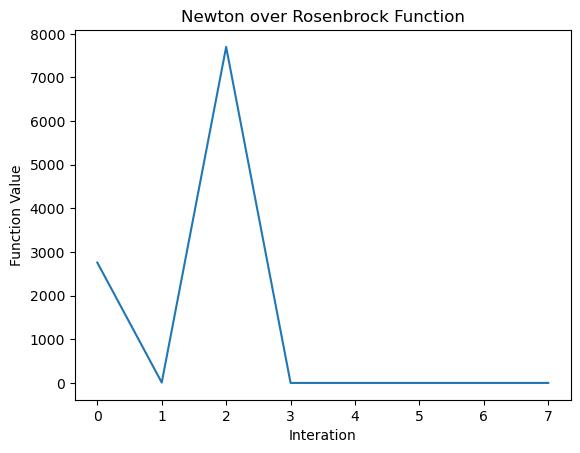

In [8]:
progress = newton(100)
plt.plot(progress[:,2])
plt.title('Newton over Rosenbrock Function')
plt.xlabel('Interation')
plt.ylabel('Function Value')
plt.show()

In [9]:
df = pd.DataFrame(progress, columns=['X', 'Y', 'Z'])
df

X         Y             Z
0 -1.966954  3.868900  2.757839e+03
1  0.995257 -7.784158  8.802816e+00
2  0.995260  0.990542  7.699528e+03
3  1.000000  0.999978  2.246803e-05
4  1.000000  1.000000  5.048124e-08
5  1.000000  1.000000  1.140348e-27
6  1.000000  1.000000  8.077936e-28
7  1.000000  1.000000  0.000000e+00

In [10]:
result_newton = []
for _ in tqdm(range(100)):
    result_newton.append(newton(100)[-1,2])

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
pd.DataFrame(result_newton)

0
0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
..  ...
95  0.0
96  0.0
97  0.0
98  0.0
99  0.0

[100 rows x 1 columns]

# Implementing Gradient Descent

In [8]:
_rosenbrock = lambda x,y,a,b: (a - x) ** 2 + b * (y - x ** 2) ** 2

gradient_rosenbrock = lambda x, y, a, b: np.asarray([(-2 * a + 4 * b * x ** 3 - 4 * b * x * y + 2 * x), 2 * b * (y - x ** 2)])

In [13]:
def gradient_descent(function_name):

    epsilon = 1e-15
    stepSize = 0.01
    x = random.uniform(-2, 2)
    y = random.uniform(-2, 2)
    
    a = 0
    b = 1
    progress = [np.asarray([x,y,_rosenbrock(x, y, a, b)])]
    pos = [x,y]
    max_iter = 10000
    for i in range(max_iter):
        pos = pos - stepSize * gradient_rosenbrock(pos[0],pos[1], a, b)
        z = _rosenbrock(pos[0], pos[1], a, b)
        progress.append(np.asarray([pos[0],pos[1],z]))
        if np.linalg.norm(z) < epsilon:
            return np.asarray(progress)
    return np.asarray(progress)

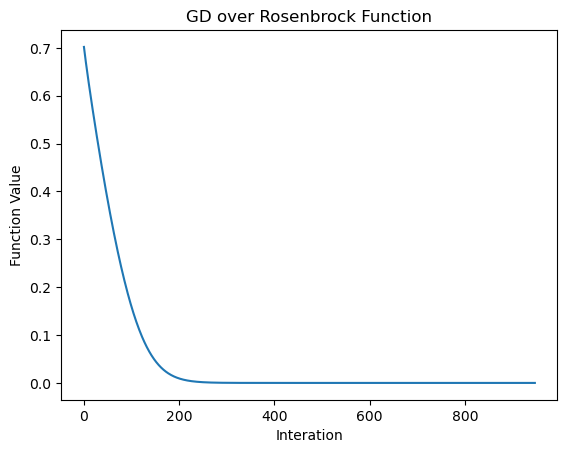

In [14]:
# Ploting GD over rosenbrock
zs = gradient_descent('rosenbrock')
plt.plot(zs[:,2])
plt.title('GD over Rosenbrock Function')
plt.xlabel('Interation')
plt.ylabel('Function Value')
plt.show()

In [15]:
df = pd.DataFrame(zs, columns=['X', 'Y', 'Z'])
df

X             Y             Z
0   -7.940319e-01  8.976445e-01  7.018600e-01
1   -7.866365e-01  8.923013e-01  6.936016e-01
2   -7.795097e-01  8.868312e-01  6.855857e-01
3   -7.726250e-01  8.812473e-01  6.777747e-01
4   -7.659587e-01  8.755614e-01  6.701378e-01
..            ...           ...           ...
943 -2.617868e-08  2.182819e-08  1.161793e-15
944 -2.565510e-08  2.139163e-08  1.115786e-15
945 -2.514200e-08  2.096379e-08  1.071601e-15
946 -2.463916e-08  2.054452e-08  1.029165e-15
947 -2.414638e-08  2.013363e-08  9.884105e-16

[948 rows x 3 columns]

In [16]:
result_gd = []
for _ in tqdm(range(100)):
    result_gd.append(gradient_descent('rosenbrock')[-1,2])

  0%|          | 0/100 [00:00<?, ?it/s]

In [17]:
np.mean(result_gd)

9.789584980271491e-16

In [18]:
np.std(result_gd)

1.1308560670626574e-17

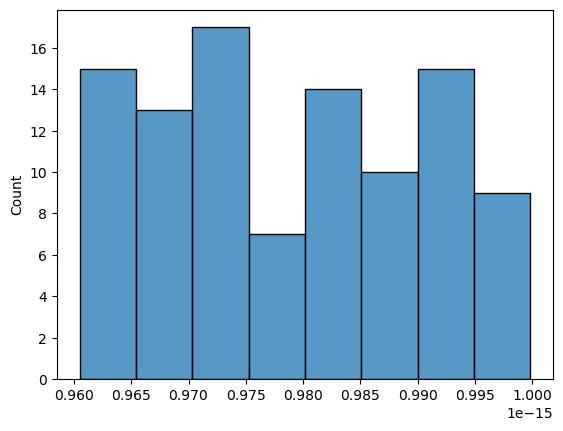

In [19]:
sns.histplot(pd.Series(result_gd))
plt.show()

In [20]:
n = 100
t = pd.DataFrame(result_gd)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t

0           cum  sample_size          mean
0   9.689635e-16  9.689635e-16            1  9.689635e-16
1   9.953614e-16  1.964325e-15            2  9.821625e-16
2   9.940854e-16  2.958410e-15            3  9.861368e-16
3   9.739118e-16  3.932322e-15            4  9.830806e-16
4   9.732698e-16  4.905592e-15            5  9.811184e-16
..           ...           ...          ...           ...
95  9.732321e-16  9.393906e-14           96  9.785318e-16
96  9.827594e-16  9.492182e-14           97  9.785754e-16
97  9.929577e-16  9.591477e-14           98  9.787222e-16
98  9.901592e-16  9.690493e-14           99  9.788377e-16
99  9.909178e-16  9.789585e-14          100  9.789585e-16

[100 rows x 4 columns]

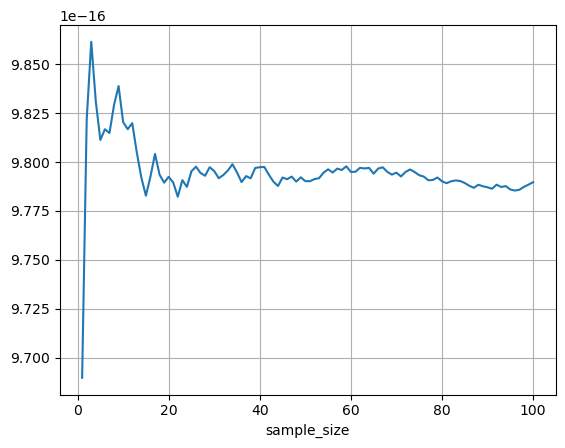

In [21]:
# Закон больших чисел
t.set_index('sample_size')['mean'].plot(grid=True)
plt.show()

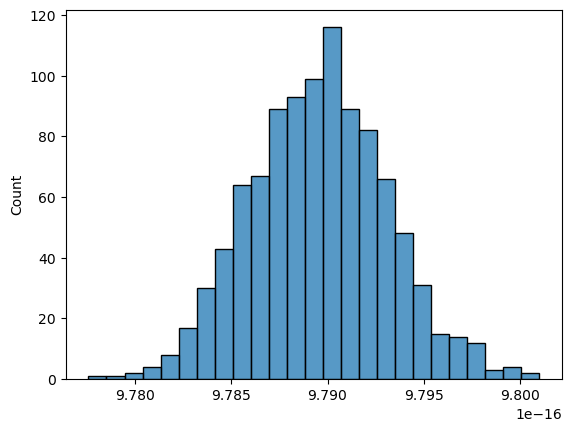

In [22]:
# Центральная предельная теорема
sns.histplot([pd.Series(result_gd).sample(1000,replace=True).mean() for _ in range(1000)])
plt.show()

# Метод роя частиц (Particle swarm optimization- PSO)

In [11]:
class PSO():
  def __init__(self, benchmark, ideal_target, error_threshold, 
               num_particles, return_frames, inertia_grad=True,
               a_const = 0, b_const= 1, c_const = 2):
    self.benchmark = benchmark
    self.a_const = a_const
    self.b_const = b_const
    self.c_const = c_const
    self.ideal_target = ideal_target
    self.error_threshold = error_threshold
    self.inertia_grad = inertia_grad
    self.num_particles = num_particles
    self.benchmark_recorder = np.array([])
    self.error_recorder = []
    self.frames = []
    self.return_frames = return_frames
    self.gbest_val = float('inf')
    self._create_particles()
    self._init_global_best_pos()

  def _create_particles(self):
    # 2D Array for best x and y
    self.particle_best_pos = np.zeros(shape=(self.num_particles, 2)) 
    self.particle_best_val = np.zeros(self.num_particles)
    self.particle_curr_pos = np.zeros(shape=(self.num_particles, 2))
    # initial velocity = 0
    self.particle_curr_velo = np.zeros(shape=(self.num_particles, 2)) 

    # Setting the initial params of the particles
    for ind_particle in range(self.num_particles):
      self.particle_curr_pos[ind_particle][0] = (-1)**(bool(random.getrandbits(1))) * \
                                                random.random()   # random start point x
      self.particle_curr_pos[ind_particle][1] = (-1)**(bool(random.getrandbits(1))) * \
                                                random.random()   # random start point y
      self.particle_best_pos[ind_particle][0] = self.particle_curr_pos[ind_particle][0]  # init best pos x = start pos x
      self.particle_best_pos[ind_particle][1] = self.particle_curr_pos[ind_particle][1]  # init best pos y = start pos y

  def _init_global_best_pos(self):
    # universally one in global topology, therefore just a 2d array required
    self.gbest_pos = np.zeros(2)    
    self.gbest_pos[0] = -1
    self.gbest_pos[1] = -1

  def pbest_setter(self):
    for particle in range(self.num_particles):
      benchmark_reward_candidate = self.benchmark(self.particle_curr_pos[particle][0], \
                                             self.particle_curr_pos[particle][1]) 
      if(self.particle_best_val[particle] > benchmark_reward_candidate):
        #update best value and corresponding position
        self.particle_best_val[particle] = benchmark_reward_candidate
        self.particle_best_pos[particle] = self.particle_curr_pos[particle]

  def gbest_setter(self):
    for particle in range(self.num_particles):
      benchmark_reward_candidate = self.benchmark(self.particle_curr_pos[particle][0], \
                                             self.particle_curr_pos[particle][1])
      if(self.gbest_val > benchmark_reward_candidate):
        self.gbest_val = benchmark_reward_candidate
        self.gbest_pos = self.particle_curr_pos[particle]

  def start_particle_motion(self):
    for particle in range(self.num_particles):
      new_velocity = (self.a_const * self.particle_curr_velo[particle]) \
                      + (self.b_const * random.random() * (self.particle_best_pos[particle] - self.particle_curr_pos[particle])) \
                      + (self.c_const * random.random() * (self.gbest_pos - self.particle_curr_pos[particle]))

      new_position = self.particle_curr_pos[particle] + new_velocity
      self.particle_curr_velo[particle] = new_velocity # update particle velocity
      self.particle_curr_pos[particle] = new_position  # update particle position
      self.benchmark_recorder = self.benchmark(self.particle_curr_pos[particle][0], \
                                                         self.particle_curr_pos[particle][1])

    # update frames list data
    self.frames.append([self.particle_curr_pos[:][0].copy(),
                          self.particle_curr_pos[:][1].copy(),
                          self.benchmark_recorder.copy()])
    
  def ps_optimizer(self, num_iterations):
    iter = 0
    while(iter < num_iterations):
      self.pbest_setter()
      self.gbest_setter()

      curr_error = self.ideal_target - self.gbest_val
    
      self.error_recorder.append(abs(curr_error))

      '''
      If the defined error threshold is acheived, return it.
      '''
      if (self.error_threshold >= abs(curr_error)):
        if self.return_frames:
            return self.frames
        
        return self.error_recorder
        break
      
      '''
      Parameter Optimization: 
      Here, we compare the results of a constant inertia 
      and time-varying inertia.
      SOTA for PSO paramtere optimzation states that
      inertia(a) should be gradually decreased from 0.9 to 0.4 over the defined
      iterations. The code below will start with a=0.9 and linearly reduce the 
      inertia parameter to 0.4
      '''
      if self.inertia_grad:
          self.a_const = 0.9 - (float(0.5)*(float(iter)/num_iterations))
      self.start_particle_motion()
      iter += 1

    if self.return_frames:
        return self.frames
    return self.error_recorder

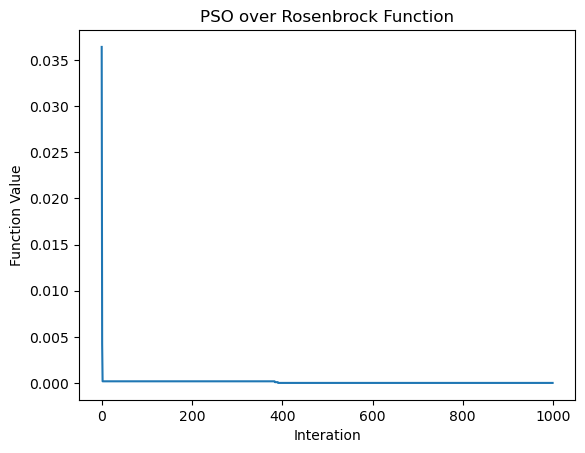

In [37]:
pso_rosenbrock = PSO(rosenbrock, 0, 1e-15, 50, return_frames=False).ps_optimizer(1000)

# Ploting PSO over rosenbrock
pd.Series(pso_rosenbrock).plot()
plt.title('PSO over Rosenbrock Function')
plt.xlabel('Interation')
plt.ylabel('Function Value')
plt.show()

In [38]:
result_pso = []
for _ in tqdm(range(100)):
    pso_history = PSO(rosenbrock, 0, 1e-15, 50, return_frames=False).ps_optimizer(1000)
    result_pso.append(pso_history[-1])

  0%|          | 0/100 [00:00<?, ?it/s]

In [39]:
np.mean(result_pso)

5.971280855900929e-05

In [40]:
np.std(result_pso)

8.674389199283279e-05

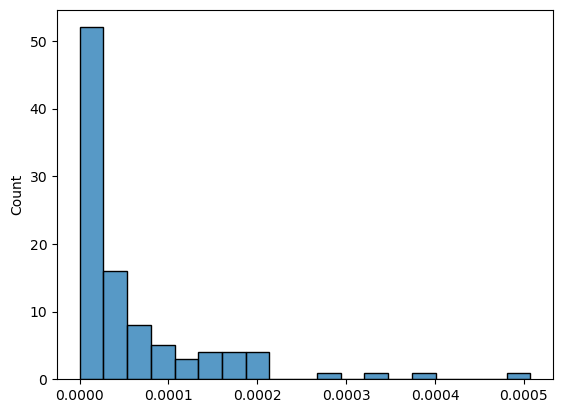

In [41]:
sns.histplot(pd.Series(result_pso))
plt.show()

In [42]:
n = 100
t = pd.DataFrame(result_pso)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t

0       cum  sample_size      mean
0   0.000001  0.000001            1  0.000001
1   0.000033  0.000034            2  0.000017
2   0.000069  0.000104            3  0.000035
3   0.000017  0.000120            4  0.000030
4   0.000010  0.000131            5  0.000026
..       ...       ...          ...       ...
95  0.000022  0.005844           96  0.000061
96  0.000029  0.005874           97  0.000061
97  0.000015  0.005888           98  0.000060
98  0.000064  0.005952           99  0.000060
99  0.000019  0.005971          100  0.000060

[100 rows x 4 columns]

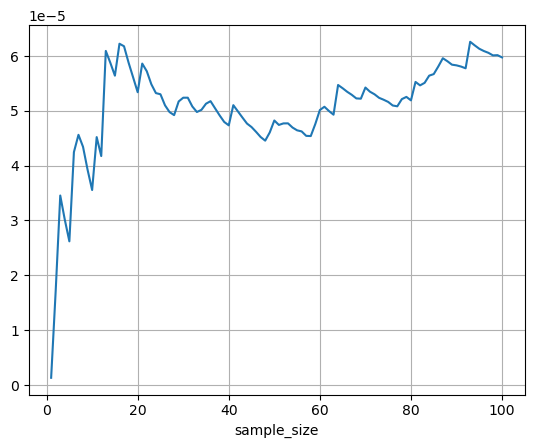

In [43]:
# Закон больших чисел
t.set_index('sample_size')['mean'].plot(grid=True)
plt.show()


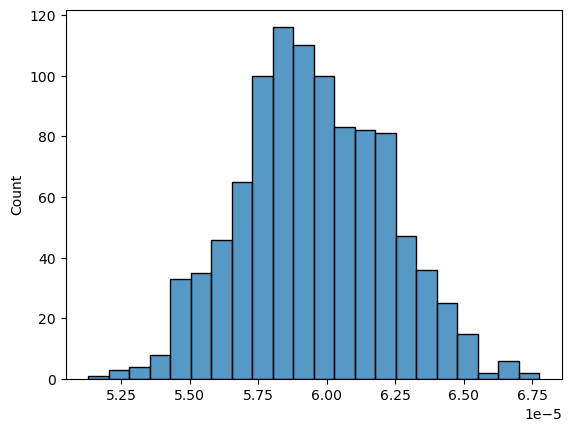

In [44]:
# Центральная предельная теорема
sns.histplot([pd.Series(result_pso).sample(1000,replace=True).mean() for _ in range(1000)])
plt.show()

# Реализация Генетического алгоритма (Implementing Genetic Algorithm)

In [45]:
from geneticalgorithm import geneticalgorithm as ga

In [46]:
def rosenbrock_ga(X):
    x,y = X
    a = 0
    b = 1
    return (a-x)**2 + b*(y-x**2)**2

 The best solution found:                                                                           
 [ 2.87411290e-06 -1.03147961e-05]

 Objective function:
 1.1465571407218822e-10


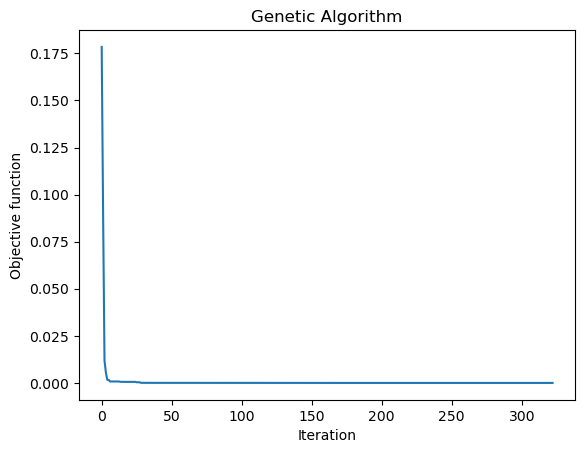

In [47]:
varbound=np.array([[-2,2]]*2)

algorithm_param = {'max_num_iteration': 1000,
                   'population_size': 100,
                   'mutation_probability':0.2,
                   'elit_ratio': 0.03,
                   'crossover_probability': 0.7,
                   'parents_portion': 0.3,
                   'crossover_type':'uniform',
                   'max_iteration_without_improv':150}

model=ga(function=rosenbrock_ga,dimension=2,variable_type='real',variable_boundaries=varbound, 
         algorithm_parameters=algorithm_param)

model.run()

In [48]:
result_ga = []
varbound=np.array([[-2,2]]*2)
for _ in tqdm(range(100)):
    model=ga(function=rosenbrock_ga,
                     progress_bar=False, 
                     convergence_curve=False,
                     dimension=2,
                     variable_type='real',
                     variable_boundaries=varbound, 
                     algorithm_parameters={'max_num_iteration': 1000,
                                           'population_size':100,
                                           'mutation_probability':0.2,
                                           'elit_ratio': 0.03,
                                           'crossover_probability': 0.7,
                                           'parents_portion': 0.3,
                                           'crossover_type':'uniform',
                                           'max_iteration_without_improv':150})
    model.run()
    result_ga.append(model.best_function)

  0%|          | 0/100 [00:00<?, ?it/s]

 The best solution found:
 [4.75070952e-05 9.80177317e-05]

 Objective function:
 1.1863957391381017e-08

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-4.42330618e-05 -6.31809822e-06]

 Objective function:
 1.9965068525209644e-09

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-1.20177698e-05  4.48352391e-05]

 Objective function:
 2.1546125022539103e-09

 The best solution found: due to the maximum number of iterations without improvement was met!
 [1.39921345e-04 1.07883335e-06]

 Objective function:
 1.9579104781032193e-08

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-1.51669712e-05  4.51354109e-05]

 Objective function:
 2.2672215703278254e-09

 The best solution found: due to the maximum number of iterations without improvement was met!
 [ 1.26014202e-05 -1.43846900e-04]

 Objective function:
 2.0850772232593907e-08

 The best s


 The best solution found: due to the maximum number of iterations without improvement was met!
 [-1.72678356e-06  2.39903632e-05]

 Objective function:
 5.785191666013046e-10

 The best solution found: due to the maximum number of iterations without improvement was met!
 [ 0.00039397 -0.00014977]

 Objective function:
 1.7769438238075323e-07

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-5.68345401e-05 -3.14999410e-04]

 Objective function:
 1.024568282888857e-07

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-8.48583765e-05  7.74765590e-05]

 Objective function:
 1.3202445499793381e-08

 The best solution found: due to the maximum number of iterations without improvement was met!
 [ 5.96130149e-08 -1.87317860e-05]

 Objective function:
 3.5088336162312415e-10

 The best solution found: due to the maximum number of iterations without improvement was met!
 [4.37520454e-08 1.42711858e-


 The best solution found: due to the maximum number of iterations without improvement was met!
 [0.00011784 0.0003911 ]

 Objective function:
 1.6683418217263839e-07

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-6.54981737e-05 -2.02796315e-04]

 Objective function:
 4.5418096152635384e-08

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-6.39167389e-05  3.11171186e-05]

 Objective function:
 5.053370348557408e-09

 The best solution found: due to the maximum number of iterations without improvement was met!
 [1.96067985e-05 1.05238915e-05]

 Objective function:
 4.951707479939912e-10

 The best solution found: due to the maximum number of iterations without improvement was met!
 [ 1.16286994e-06 -5.17180364e-07]

 Objective function:
 1.6197434298519364e-12

 The best solution found: due to the maximum number of iterations without improvement was met!
 [-8.59134251e-07  3.70811382e-05

In [55]:
np.mean(result_ga)

7.397826124372625e-08

In [56]:
np.std(result_ga)

2.1178867996719383e-07

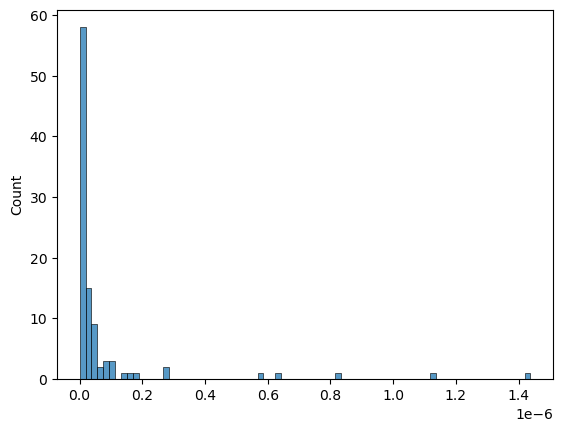

In [51]:
sns.histplot(pd.Series(result_ga))
plt.show()

In [52]:
n = 100
t = pd.DataFrame(result_ga)
t['cum'] = t[0].cumsum()
t['sample_size'] = range(1,n+1)
t['mean'] = t['cum'] / t['sample_size']
t


0           cum  sample_size          mean
0   1.186396e-08  1.186396e-08            1  1.186396e-08
1   1.996507e-09  1.386046e-08            2  6.930232e-09
2   2.154613e-09  1.601508e-08            3  5.338359e-09
3   1.957910e-08  3.559418e-08            4  8.898545e-09
4   2.267222e-09  3.786140e-08            5  7.572281e-09
..           ...           ...          ...           ...
95  4.541810e-08  7.390900e-06           96  7.698854e-08
96  5.053370e-09  7.395954e-06           97  7.624694e-08
97  4.951707e-10  7.396449e-06           98  7.547397e-08
98  1.619743e-12  7.396450e-06           99  7.471162e-08
99  1.375749e-09  7.397826e-06          100  7.397826e-08

[100 rows x 4 columns]

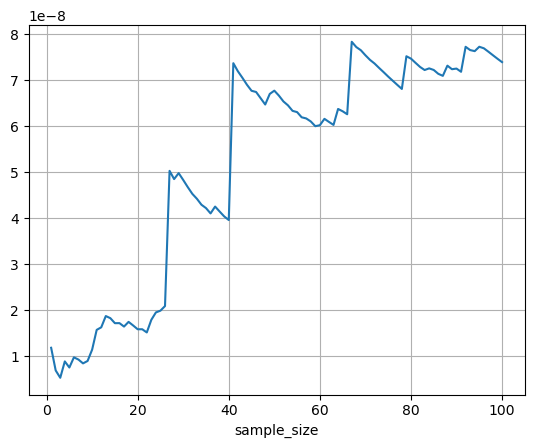

In [53]:
# Закон больших чисел
t.set_index('sample_size')['mean'].plot(grid=True)
plt.show()

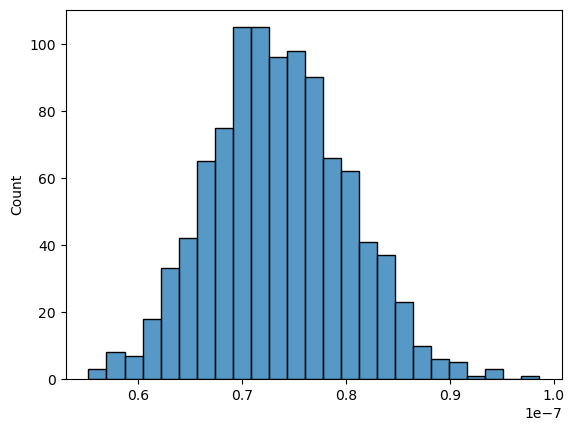

In [54]:
# Центральная предельная теорема
sns.histplot([pd.Series(result_ga).sample(1000,replace=True).mean() for _ in range(1000)])
plt.show()

#  Comparing GA, PSO and Gradient Descent 

In [60]:
# Function to plot the comparison of GD, PSO and GA given a benchmark function
def plot_ga_pso_gd_comparison(function_name):

    sns.kdeplot(result_ga)
    plt.axvline(np.mean(result_ga), ls='--', c='r')
    plt.xlabel('Function Value')
    plt.title('GA final values distribution after 100 executions')
    plt.show()
    
    sns.kdeplot(result_pso)
    plt.axvline(np.mean(result_pso), ls='--', c='r')
    plt.xlabel('Function Value')
    plt.title('PSO final values distribution after 100 executions')
    plt.show()

    sns.kdeplot(result_gd)
    plt.axvline(np.mean(result_gd), ls='--', c='r')
    plt.xlabel('Function Value')
    plt.title('GD final values distribution after 100 executions')
    plt.show()

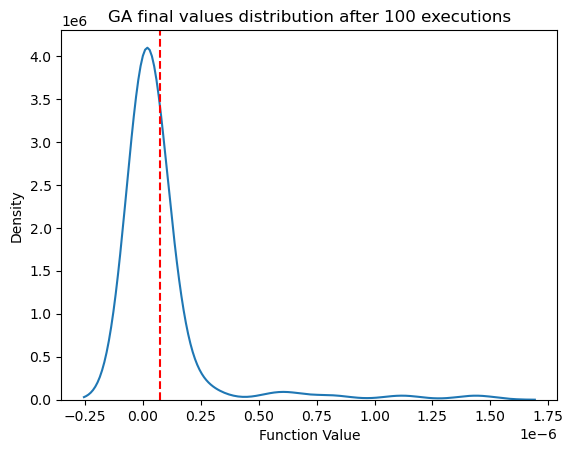

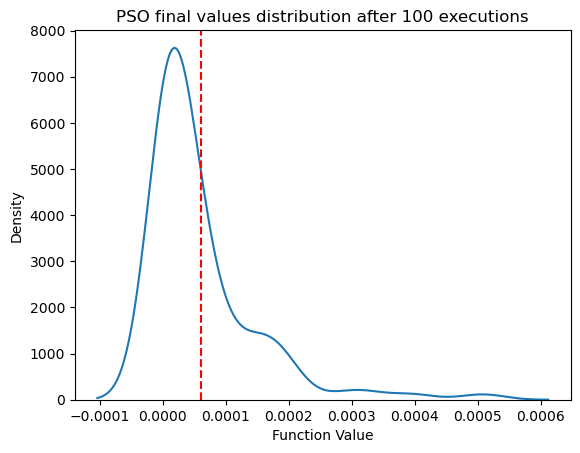

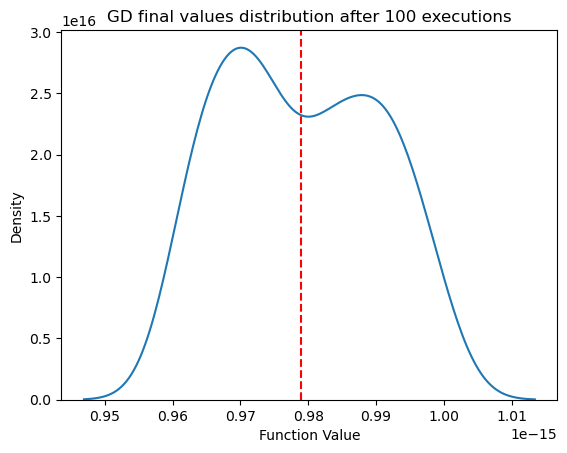

In [61]:
# Rosenbrock comparison between GA, PSO and GD
plot_ga_pso_gd_comparison(rosenbrock)

In [59]:
df = pd.DataFrame(np.array([['Newton', np.mean(result_newton), np.std(result_newton),'00:00:00'],
                            ['GD', np.mean(result_gd), np.std(result_gd), '00:00:03'],
                            ['PSO', np.mean(result_pso), np.std(result_pso), '00:02:08'],
                            ['GA', np.mean(result_ga), np.std(result_ga), '00:15:16']]),
                  columns=['Optimizator','Expected_Value','Standar_deviation','Time_for_100_iters'])
df = df.style.set_properties(**{'font-size': '12pt'})
df

# Animation

In [5]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from IPython.core.display import HTML
from matplotlib import cm

In [6]:
def gradient_descent_animation(function_name):
    stepSize = 0.01
    x = random.uniform(-2, 2)
    y = random.uniform(-2, 2)

    a = 0
    b = 1
    progress = [np.asarray([x,y,_rosenbrock(x, y, a, b)])]
    pos = [x,y]
    max_iter = 1000
    for i in range(max_iter):
        pos = pos - stepSize * gradient_rosenbrock(pos[0],pos[1], a, b)
        z = _rosenbrock(pos[0], pos[1], a, b)
        progress.append(np.asarray([pos[0],pos[1],z]))
    return np.asarray(progress)


def update(i, data, graph):
    graph._offsets3d = (data[i][0], data[i][1], data[i][2])
    graph.axes.view_init(azim=i/2)
    # ax.view_init(azim=angle)

def generate_visualization(data, function, save=True, alpha=0.5, file_name='animation'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xs = np.arange(-2, 2, 0.25)
    ys = np.arange(-2, 2, 0.25)
    X, Y = np.meshgrid(xs, ys)

    Z = function(X, Y)

    ax.plot_surface(X, Y, Z, alpha=alpha, cmap=cm.magma)
    graph = ax.scatter(data[0][0], data[0][1], data[0][2], c='black', s=10, alpha=0.7)


    # Number of iterations
    iterations = len(data)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Animated Scatter Example')
    ax.view_init(25, 10)

    fps = 50
    ani = animation.FuncAnimation(fig, 
                                  update, 
                                  iterations,
                                  fargs=(data, graph),
                                  interval=1000/fps)

    if save:
        Writer = animation.writers['ffmpeg']
        writer = Writer(fps=fps, 
                        extra_args=['-vcodec', 'libx264'])
        ani.save(f'{file_name}.mp4', writer=writer)

    return ani

In [ ]:
# conda install ffmpeg

In [9]:
frames = gradient_descent_animation('rosenbrock')
print(frames.shape)
ani = generate_visualization(frames.reshape((1001, 3,1)), rosenbrock, alpha=0.3, file_name='RosenbrockGD');

HTML(ani.to_html5_video())

(1001, 3)


In [12]:
frames = PSO(rosenbrock, 0, 1e-15, 50, return_frames=True).ps_optimizer(1000)
print(np.asarray(frames).shape)
ani = generate_visualization(np.array(frames), rosenbrock, alpha=0.3, file_name='rosenbrockPSO');
   
HTML(ani.to_html5_video())

(1000, 3)
